In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("../dataset/dem_features.csv")
df.head()

,latitude,longitude,elevation,slope,aspect
0,1.0,72.000000,0.0,0.0,-0.0
1,1.0,72.002778,0.0,0.0,-0.0
2,1.0,72.005556,0.0,0.0,-0.0
3,1.0,72.008333,0.0,0.0,-0.0
4,1.0,72.011111,0.0,0.0,-0.0


In [4]:
df.columns.tolist()

['latitude', 'longitude', 'elevation', 'slope', 'aspect']

In [5]:
df.shape

(130321, 5)

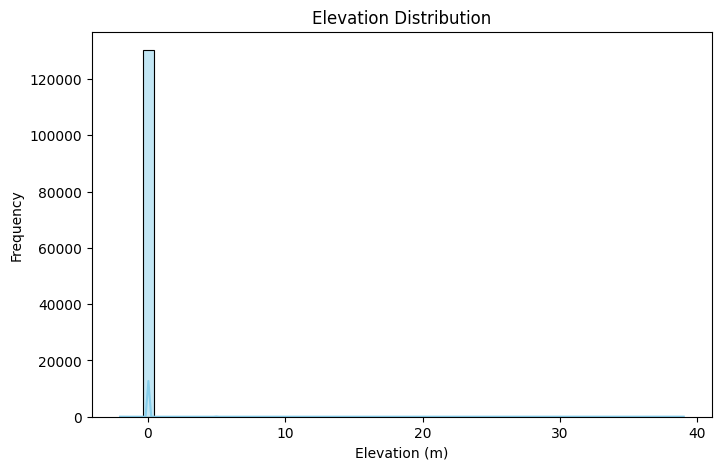

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['elevation'], bins=50, kde=True, color='skyblue')
plt.title("Elevation Distribution")
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.show()

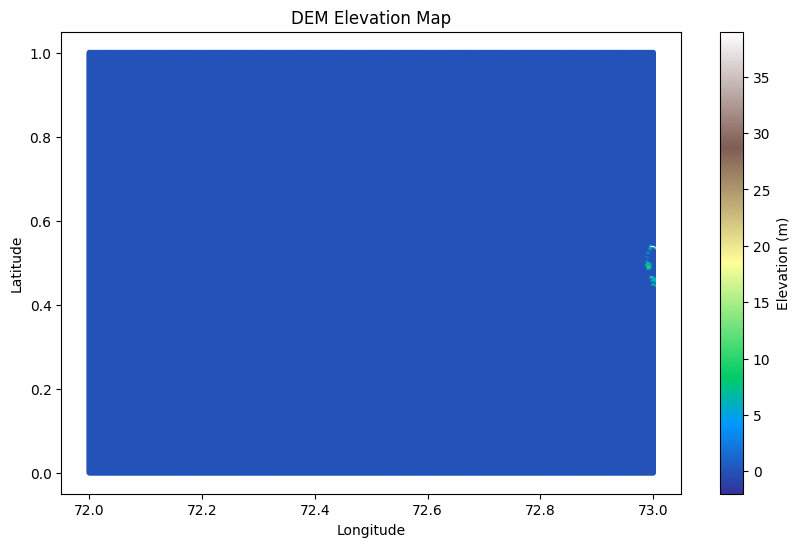

In [8]:
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(10,6))
    sc = plt.scatter(df['longitude'], df['latitude'],
                     c=df['elevation'], cmap='terrain', s=10)
    plt.colorbar(sc, label="Elevation (m)")
    plt.title("DEM Elevation Map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

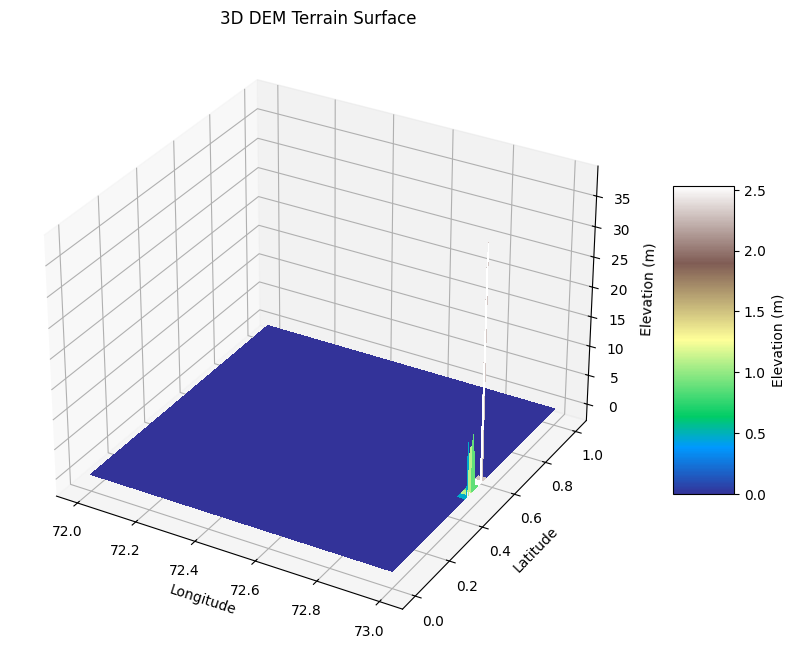

In [9]:
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Pivot data into grid for surface plot
    pivot = df.pivot_table(index='latitude', columns='longitude', values='elevation')
    X, Y = np.meshgrid(pivot.columns, pivot.index)
    Z = pivot.values

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='terrain', linewidth=0, antialiased=False)

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label="Elevation (m)")
    ax.set_title("3D DEM Terrain Surface")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Elevation (m)")

    plt.show()
else:
    print("⚠️ 3D plot requires 'latitude' and 'longitude' columns in the CSV.")